# Tree traversal algorithm


```{seealso}
- [Tree traversal algorithm](https://www.geeksforgeeks.org/tree-traversals-inorder-preorder-and-postorder/)
```

## Define two trees

In [1]:
tree1 = "((((s1,s2),s3),s4),s5);"
tree2 = "(((s1,s2),s3),s4,s5);"

is.rooted = function(treestring){
	character = unlist(strsplit(treestring,split=""))

	comma = sum(character==',')
	leftp = sum(character=='(')

	if(comma == leftp){
		rooted=TRUE
	}else{
		rooted=FALSE
	}
	rooted
}
is.rooted(tree1)
is.rooted(tree2)

[1] TRUE

[1] FALSE

## Find the species under an internal node

Loading required package: ape




Attaching package: 'ape'




The following object is masked _by_ '.GlobalEnv':

    is.rooted




Loading required package: Matrix




Attaching package: 'phybase'




The following objects are masked from 'package:ape':

    dist.dna, node.height




[1] 1 1 1 0 0

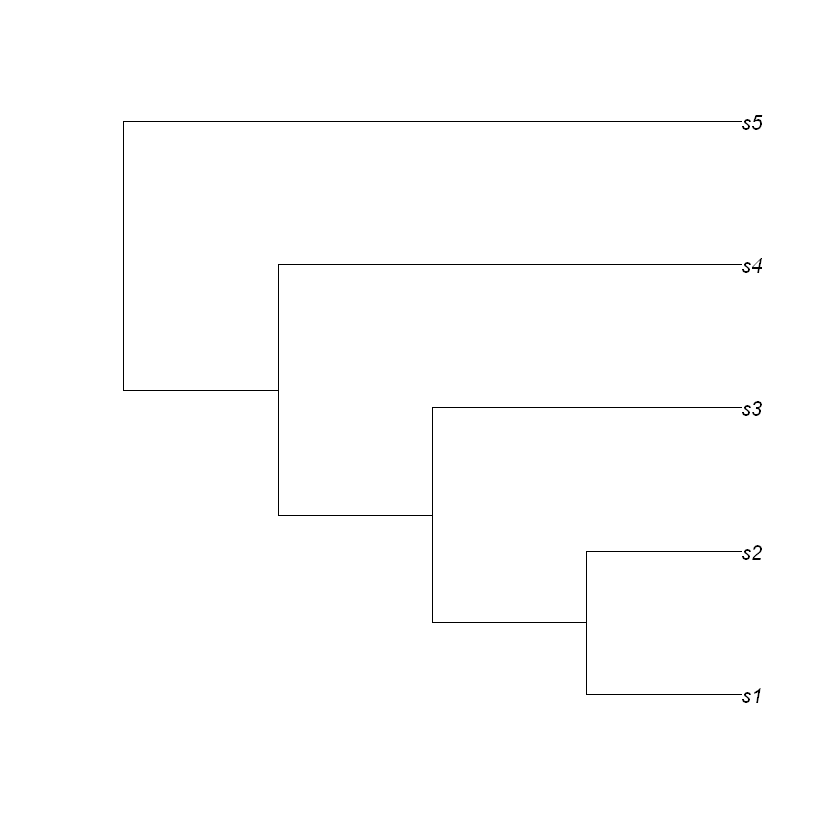

In [2]:
library(phybase)
tree=read.tree.nodes(tree1)
species = tree$names
nspecies = length(species)
nodes = tree$nodes

find_offspring = function(inode, treenodes, taxanames, nspecies, offspring){
	if(inode <= nspecies){
		offspring[inode] = 1
		return (offspring)
	}else{
		son1 = treenodes[inode,2]
		son2 = treenodes[inode,3]
		offspring = find_offspring(son1, treenodes, taxanames, nspecies, offspring)
		offspring = find_offspring(son2, treenodes, taxanames, nspecies, offspring)
	}
	return (offspring)
}

offspring1 = rep(0,nspecies)
find_offspring(inode=7, nodes, species, nspecies, offspring1)
plot(read.tree(text=tree1))

## Inorder tree traversal: left -> root -> right

[1] 1
[1] 6
[1] 2
[1] 7
[1] 3
[1] 8
[1] 4
[1] 9
[1] 5


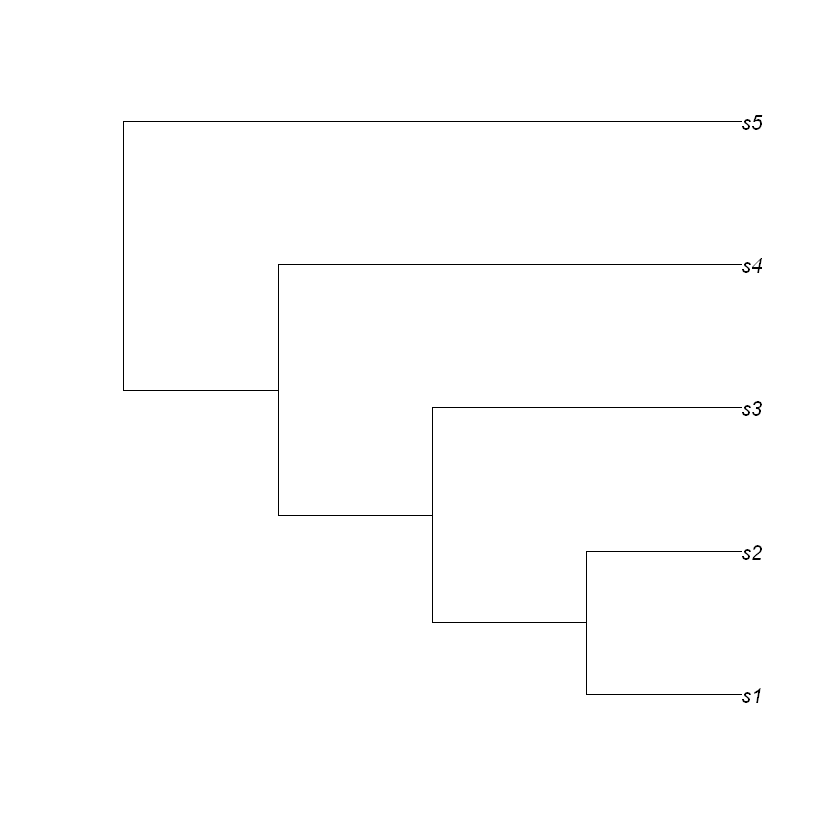

In [3]:
inor = rep(0, dim(nodes)[1])
index=1

inorder = function(inode, treenodes, nspecies){
	if(inode <= nspecies){
		print(inode)
		inor[index] <<- inode
		index<<-index+1
	}else{
		left = treenodes[inode,2]
		right = treenodes[inode,3]
		inorder(left, treenodes, nspecies)	
		print(inode)
		inor[index] <<- inode
		index<<-index+1
		inorder(right, treenodes, nspecies)	
	}
}

inorder(9, nodes, nspecies)
plot(read.tree(text=tree1))

## Preorder tree traversal: root -> left -> right

[1] 9
[1] 8
[1] 7
[1] 6
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


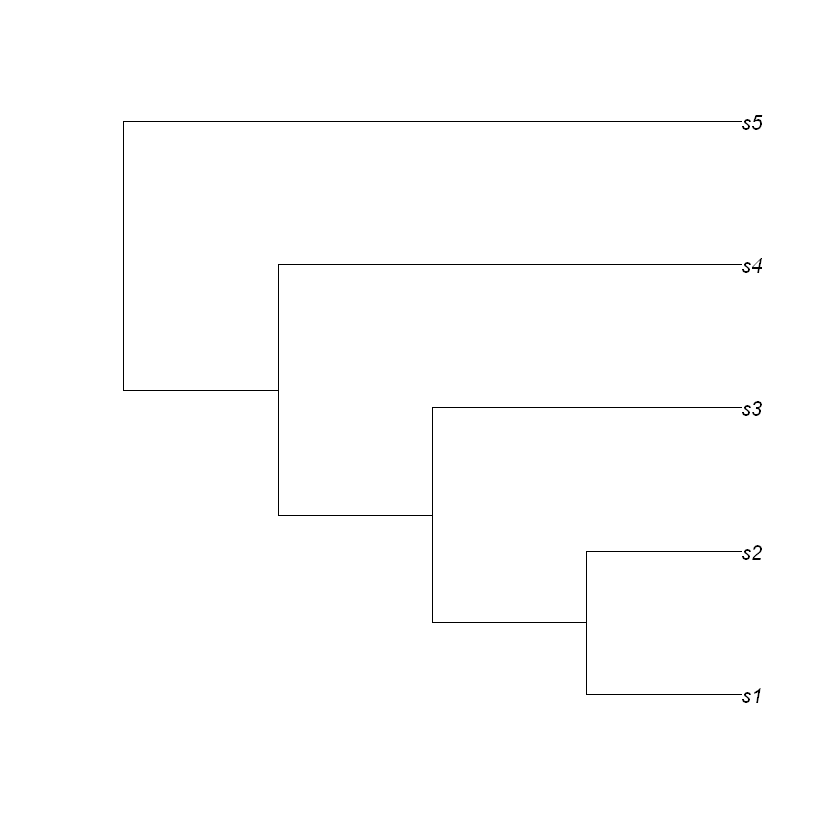

In [4]:
preorder = function(inode, treenodes, nspecies){
	if(inode <= nspecies){
		print(inode)
	}else{
		left = treenodes[inode,2]
		right = treenodes[inode,3]
		print(inode)
		preorder(left, treenodes, nspecies)	
		preorder(right, treenodes, nspecies)
				
	}
}


preorder(9, nodes, nspecies)
plot(read.tree(text=tree1))

## Postorder tree traversal: left -> right -> root

[1] 1
[1] 2
[1] 6
[1] 3
[1] 7
[1] 4
[1] 8
[1] 5
[1] 9


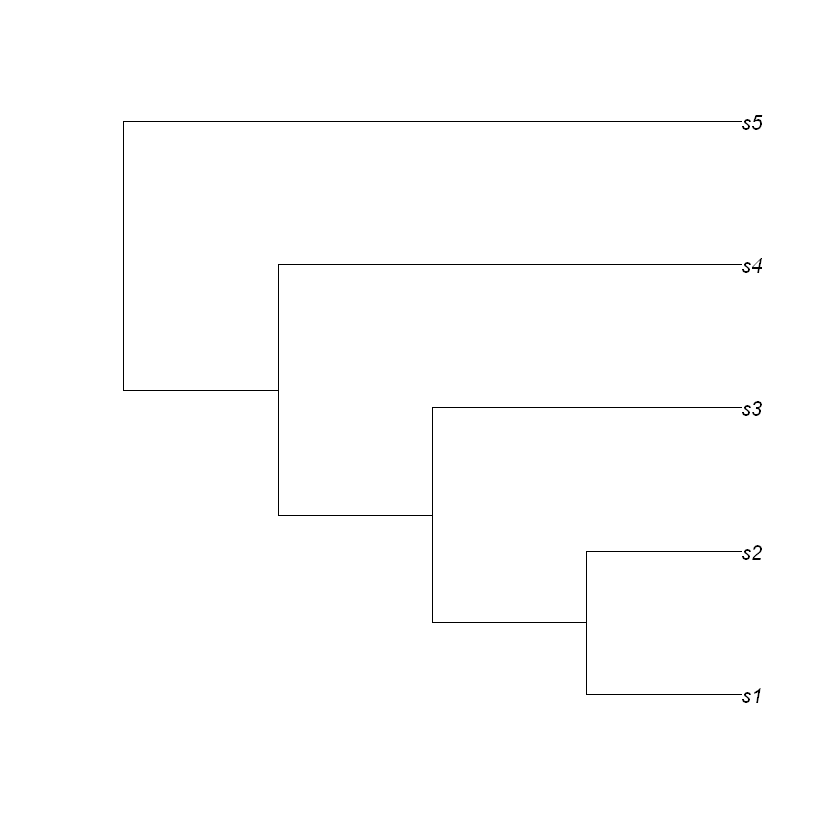

In [5]:
postorder = function(inode, treenodes, nspecies){
	if(inode <= nspecies){
		print(inode)
	}else{
		left = treenodes[inode,2]
		right = treenodes[inode,3]
		postorder(left, treenodes, nspecies)	
		postorder(right, treenodes, nspecies)
		print(inode)		
	}
}

postorder(9, nodes, nspecies)
plot(read.tree(text=tree1))